In [15]:
import pandas as pd
file = './data/MOE_GRID_1078.xlsx'
df = pd.read_excel(open(file, "rb"))

rd = {"DESCRIPTOR" : "GRID_DESCRIPTOR"}
df.rename(columns = rd, inplace=True)

for v in df.columns:
    print("\""+v+"\"")


"Unnamed: 0"
"Unnamed: 0.1"
"UNIQUEID"
"SMILE"
"SETID"
"GRID_DESCRIPTOR"
"LOGD"
"mol"
"AM1_dipole"
"AM1_E"
"AM1_Eele"
"AM1_HF"
"AM1_HOMO"
"AM1_IP"
"AM1_LUMO"
"apol"
"ASA"
"ASA+"
"ASA-"
"ASA_H"
"ASA_P"
"ast_fraglike"
"ast_fraglike_ext"
"ast_violation"
"ast_violation_ext"
"a_acc"
"a_acid"
"a_aro"
"a_base"
"a_count"
"a_don"
"a_donacc"
"a_heavy"
"a_hyd"
"a_IC"
"a_ICM"
"a_nB"
"a_nBr"
"a_nC"
"a_nCl"
"a_nF"
"a_nH"
"a_nI"
"a_nN"
"a_nO"
"a_nP"
"a_nS"
"balabanJ"
"BCUT_PEOE_0"
"BCUT_PEOE_1"
"BCUT_PEOE_2"
"BCUT_PEOE_3"
"BCUT_SLOGP_0"
"BCUT_SLOGP_1"
"BCUT_SLOGP_2"
"BCUT_SLOGP_3"
"BCUT_SMR_0"
"BCUT_SMR_1"
"BCUT_SMR_2"
"BCUT_SMR_3"
"bpol"
"b_1rotN"
"b_1rotR"
"b_ar"
"b_count"
"b_double"
"b_heavy"
"b_max1len"
"b_rotN"
"b_rotR"
"b_single"
"b_triple"
"CASA+"
"CASA-"
"chi0"
"chi0v"
"chi0v_C"
"chi0_C"
"chi1"
"chi1v"
"chi1v_C"
"chi1_C"
"chiral"
"chiral_u"
"DASA"
"DCASA"
"dens"
"density"
"diameter"
"dipole"
"dipoleX"
"dipoleY"
"dipoleZ"
"E"
"E_ang"
"E_ele"
"E_nb"
"E_oop"
"E_rele"
"E_rnb"
"E_rsol"
"E_rvdw"
"E

In [16]:
import numpy as np 
import string


list_of_desc = ["a_acc", \
                  "a_base", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol", \
                  "GRID_DESCRIPTOR"]

basicname = ["G", "M", "GM", \
             "GTr", "GTe", \
             "MTe", "MTr", \
             "GMTe", "GMTr"]

X = {}
Y = {}
setid = {}
uniqueid = {}

for bn in basicname:
    X[bn] = []
    Y[bn] = []
    setid[bn] = []
    uniqueid[bn] = []

for idx, ss in enumerate(df["UNIQUEID"]):
    
    fdesc = df[df["UNIQUEID"] == ss]
    
    xval = {}
    for bn in basicname:
        xval[bn] = []

    for d in list_of_desc:
        if d == "GRID_DESCRIPTOR":
            nvs = fdesc[d].values[0].split()
            xval["GM"].extend([float(nv) for nv in nvs])  
            xval["G"].extend([float(nv) for nv in nvs])  
            xval["GMTr"].extend([float(nv) for nv in nvs])  
            xval["GTr"].extend([float(nv) for nv in nvs])  
            xval["GMTe"].extend([float(nv) for nv in nvs])  
            xval["GTe"].extend([float(nv) for nv in nvs])  
        else:
            xval["GM"].append(fdesc[d].values[0])
            xval["M"].append(fdesc[d].values[0])
            xval["GMTr"].append(fdesc[d].values[0])
            xval["MTr"].append(fdesc[d].values[0])
            xval["GMTe"].append(fdesc[d].values[0])
            xval["MTe"].append(fdesc[d].values[0])
            
    y = df[df["UNIQUEID"] == ss]['LOGD'].values[0]
    sid = df[df["UNIQUEID"] == ss]['SETID'].values[0]
    uid = df[df["UNIQUEID"] == ss]['UNIQUEID'].values[0]
    
    for bn in ["GM", "G", "M"]:
        X[bn].append(xval[bn])
        Y[bn].append(y)
        setid[bn].append(sid)
        uniqueid[bn].append(uid)
        
    if (sid == "Tr"):
        for bn in ["GMTr", "GTr", "MTr"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)
    elif (sid == "Te"):
        for bn in ["GMTe", "GTe", "MTe"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)

    
for bn in basicname:
    print(bn, " : ")
    print("  ", np.asarray(Y[bn]).shape, np.asarray(X[bn]).shape )

G  : 
   (1078,) (1078, 1879)
M  : 
   (1078,) (1078, 29)
GM  : 
   (1078,) (1078, 1908)
GTr  : 
   (865,) (865, 1879)
GTe  : 
   (213,) (213, 1879)
MTe  : 
   (213,) (213, 29)
MTr  : 
   (865,) (865, 29)
GMTe  : 
   (213,) (213, 1908)
GMTr  : 
   (865,) (865, 1908)


I valori di MSE ed r2_score  calcolati (variando il numero di componenti principali da usare) sul TRAINING SET di GRID con cv=10 sono :
   1 1.87513100 0.46408395
   2 1.46879385 0.58021589
   3 1.32194448 0.62218573
   4 1.21643614 0.65234021
   5 1.21652130 0.65231587
   6 1.21332723 0.65322874
   7 1.21297459 0.65332953
   8 1.21161278 0.65371874
   9 1.21296449 0.65333242
  10 1.21329547 0.65323782
  11 1.21442555 0.65291484
  12 1.21437165 0.65293025
  13 1.21422757 0.65297143
  14 1.21431839 0.65294547
  15 1.21432903 0.65294243
  16 1.21433783 0.65293991
  17 1.21433305 0.65294128
  18 1.21433814 0.65293982
  19 1.21434044 0.65293917
Valutazione del numero di componenti ideale per costruire il modello PLS con i soli descrittori di GRID :


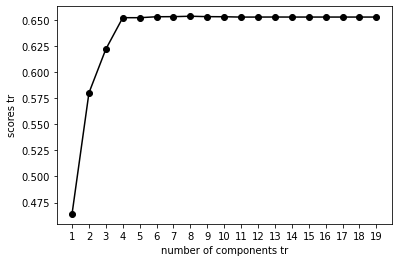

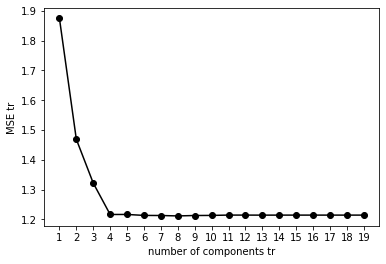

Numero di componenti principali suggerite usando i descrittori di GRID tr:  8
Valutazione occhiometrica del numero di componenti da usare GRID tr : 4
Calcolo di tutti i valori di diff
yTe:        Y_8_G_Te: diff_8_tTe: Y_4_G_Te: diff_4_Te:
-0.7400000  0.7472426 -1.4872426  0.8060509 -1.5460509
-0.6800000 -0.0977943 -0.5822057  0.0043230 -0.6843230
-0.5000000  0.8161311 -1.3161311  0.8019107 -1.3019107
-0.3900000 -0.2523867 -0.1376133 -0.2709288 -0.1190712
-0.3400000 -0.2866249 -0.0533751 -0.1951396 -0.1448604
-0.2100000  0.0226675 -0.2326675  0.0336311 -0.2436311
-0.1900000 -0.0536949 -0.1363051  0.0450882 -0.2350882
-0.1300000  1.2608916 -1.3908916  1.3669495 -1.4969495
-0.0400000  1.2662220 -1.3062220  1.1885111 -1.2285111
 0.0500000  2.4162636 -2.3662636  2.5826170 -2.5326170
 0.2000000  1.8928967 -1.6928967  1.8491412 -1.6491412
 0.2100000 -0.1178443  0.3278443 -0.0953531  0.3053531
 0.3000000  0.3766329 -0.0766329  0.4816353 -0.1816353
 0.4000000  0.7303638 -0.3303638  0.5382043 -0

-1.1100000 -1.0743360 -0.0356640 -0.9577266 -0.1522734
 2.7700000  2.7698867  0.0001133  2.7919553 -0.0219553
 1.9100000  1.9218253 -0.0118253  1.9031194  0.0068806
 3.2000000  3.2052050 -0.0052050  3.0754820  0.1245180
 1.5000000  1.5054636 -0.0054636  1.4410572  0.0589428
 0.5200000  0.5139336  0.0060664  0.6441645 -0.1241645
 5.2500000  5.2669727 -0.0169727  5.2808838 -0.0308838
-0.6200000 -0.6358049  0.0158049 -0.8000441  0.1800441
-0.9900000 -1.0018931  0.0118931 -0.6908744 -0.2991256
-0.5400000 -0.5112456 -0.0287544 -0.7394251  0.1994251
 2.5900000  2.5844756  0.0055244  2.5785368  0.0114632
 1.8900000  1.8797696  0.0102304  1.6744651  0.2155349
 2.2200000  2.2218423 -0.0018423  2.3597460 -0.1397460
-0.1900000 -0.2325169  0.0425169 -0.4773044  0.2873044
-0.9600000 -0.9944891  0.0344891 -0.9953283  0.0353283
-0.0500000 -0.0703232  0.0203232 -0.2081231  0.1581231
-0.7200000 -0.7457683  0.0257683 -0.9288489  0.2088489
-0.3900000 -0.4074411  0.0174411 -0.4910858  0.1010858
-0.5100000

 0.3400000  2.0657147 -1.7257147  1.9848181 -1.6448181
-0.2300000 -0.2016621 -0.0283379 -0.4143135  0.1843135
-0.1100000 -0.0816585 -0.0283415 -0.2608109  0.1508109
 1.1400000  1.1151617  0.0248383  1.1603732 -0.0203732
 0.7800000  0.8025703 -0.0225703  0.3861089  0.3938911
 1.1700000  1.1250713  0.0449287  0.7855529  0.3844471
-3.6200000 -3.6694871  0.0494871 -3.5962211 -0.0237789
 0.3300000  0.3536121 -0.0236121  0.3492776 -0.0192776
-1.1200000 -1.1719123  0.0519123 -1.0516370 -0.0683630
 0.0800000  0.0253031  0.0546969  0.3251397 -0.2451397
 3.4200000  3.4135289  0.0064711  3.5753817 -0.1553817
 4.1500000  2.5745944  1.5754056  2.6025951  1.5474049
-0.5400000 -0.5613306  0.0213306 -0.4981525 -0.0418475
 3.3100000  3.3176561 -0.0076561  3.1898074  0.1201926
-2.8800000 -2.8673390 -0.0126610 -2.1933984 -0.6866016
-0.7200000 -0.6789102 -0.0410898 -1.0114576  0.2914576
-3.3400000 -3.2357287 -0.1042713 -4.2473931  0.9073931
-0.5800000 -0.5644638 -0.0155362 -0.4470696 -0.1329304
 1.8100000

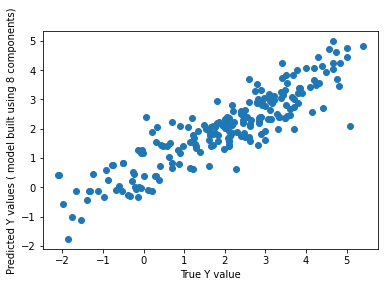

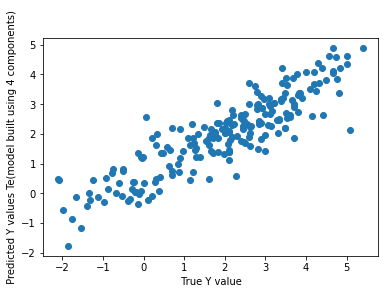

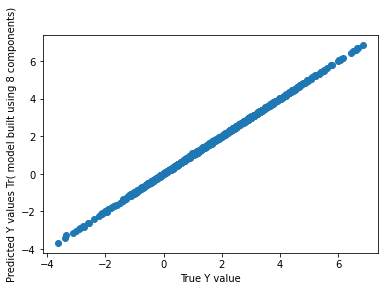

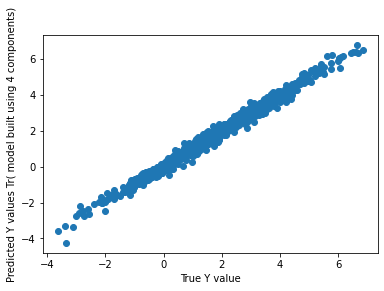

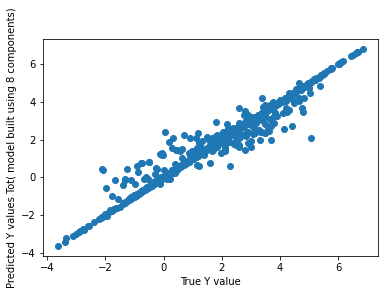

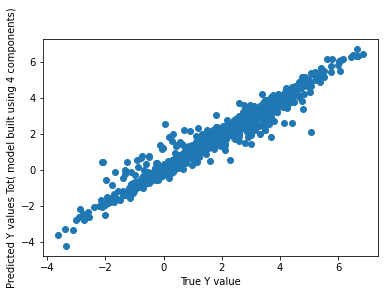

scatter plot diff vs valore reale (valutazione errore sistematico)


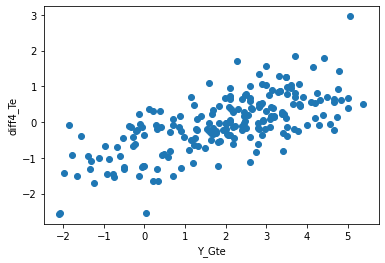

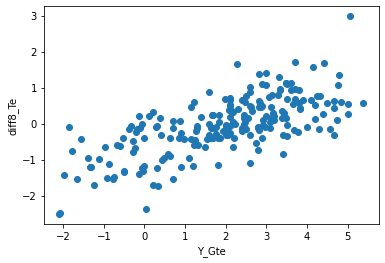

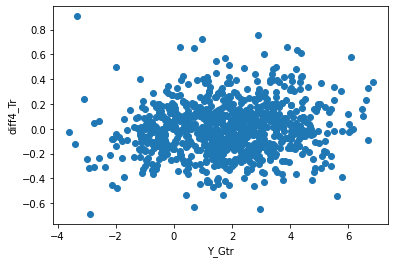

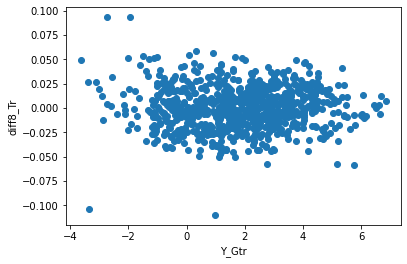

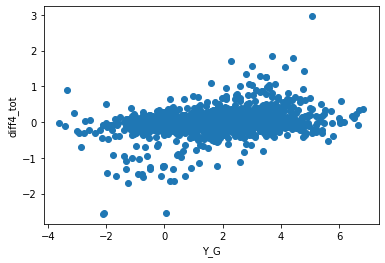

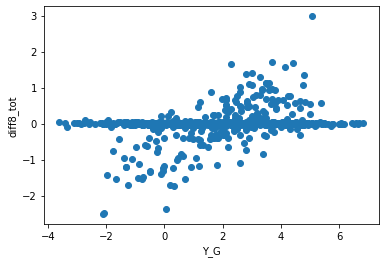

MSE, RMSE,r2_score per tutti i modelli con cv=10 per training, test, total set
comp:    8 MSE tr: 1.21161278 score tr: 0.65371874 RMSE tr: 0.02174561
comp:    4 MSE tr: 1.21643614 score tr: 0.65234021 RMSE tr: 0.20997801
comp:    8 MSE te: 0.64207691 score te: 0.77959688 RMSE te: 0.80129702
comp:    4 MSE te: 0.66587811 score te: 0.77142674 RMSE te: 0.81601355
Valori STDEV(diff) su training, test, total set
Stdev4_G_Te: 0.81526844 Stdev8_G_Te: 0.80034330
Stdev4_G_Tr: 0.20997801 Stdev8_G_Tr: 0.02174561
Stdev4_G_Tot: 0.40853532 Stdev8_G_Tot: 0.35663227
Valori AVG(ABS) su training, test, total set :
Stdev4_G_Te: 0.62120538 Stdev8_G_Te: 0.60621516
Stdev4_G_Tr: 0.16187664 Stdev8_G_Tr: 0.01684205
Stdev4_G_Tot: 0.25263455 Stdev8_G_Tot: 0.13329518


In [19]:
# GRID
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

trscores = []
trmses = []
trncomps = []
print("I valori di MSE ed r2_score  calcolati (variando il numero di componenti principali da usare) sul TRAINING SET di GRID con cv=10 sono :")
for trncomp in range(1,20):
    pls = PLSRegression(trncomp)
    pls.fit(X['GTr'], Y['GTr'])
    
    y_cv_GTr = cross_val_predict(pls, X['GTr'], Y['GTr'], cv=10)
    
    trscore = r2_score(Y['GTr'], y_cv_GTr)
    trmse = mean_squared_error(Y['GTr'], y_cv_GTr)
    
    trscores.append(trscore)
    trmses.append(trmse)
    trncomps.append(trncomp)
    print("%4d %10.8f %10.8f"%(trncomp, trmse, trscore))
    
msetrmin = np.argmin(trmses)
print("Valutazione del numero di componenti ideale per costruire il modello PLS con i soli descrittori di GRID :")
    
plt.plot(trncomps, trscores, '-o', color='black')
plt.xlabel('number of components tr')
plt.ylabel('scores tr')
plt.xticks(trncomps)
plt.show()

plt.plot(trncomps, trmses, '-o', color='black')
plt.xlabel('number of components tr')
plt.ylabel('MSE tr')
plt.xticks(trncomps)
plt.show()
print("Numero di componenti principali suggerite usando i descrittori di GRID tr: ", msetrmin+1)
print("Valutazione occhiometrica del numero di componenti da usare GRID tr : 4")

# Costruzione modello PLS con 8 componenti cv=10 usando descrittori di GRID
ncomp8 = 8

pls_8_GRID = PLSRegression(ncomp8)
pls_8_GRID.fit(X['GTr'], Y['GTr'])
    
y_cv8_G_Tr = cross_val_predict(pls_8_GRID, X['GTr'], Y['GTr'], cv=10)

# Costruzione modello PLS a 4 componenti cv=10 usando descrittori di GRID
ncomp4 = 4

pls_4_GRID = PLSRegression(ncomp4)
pls_4_GRID.fit(X['GTr'], Y['GTr'])
    
y_cv4_G_Tr = cross_val_predict(pls_4_GRID, X['GTr'], Y['GTr'], cv=10)

# Calcolo di tutti i valori predetti dai nostri modelli con cv=10 su training, test, total set
Y_pred8_G_Te = pls_8_GRID.predict(X['GTe'])
Y_pred4_G_Te = pls_4_GRID.predict(X['GTe'])
Y_pred8_G_Tr = pls_8_GRID.predict(X['GTr'])
Y_pred4_G_Tr = pls_4_GRID.predict(X['GTr'])
Y_pred8_G_Tot = pls_8_GRID.predict(X['G'])
Y_pred4_G_Tot = pls_4_GRID.predict(X['G'])


print("Calcolo di tutti i valori di diff")
diff4_GRID_TE = []
diff8_GRID_TE = []
print("yTe:        Y_8_G_Te: diff_8_tTe: Y_4_G_Te: diff_4_Te:")
for idx, val in enumerate(Y['GTe']):
    diff4_GRID_TE.append(val-Y_pred4_G_Te[idx])
    diff8_GRID_TE.append(val-Y_pred8_G_Te[idx])
    print("%10.7f %10.7f %10.7f %10.7f %10.7f"%(\
                                val, Y_pred8_G_Te[idx], diff8_GRID_TE[-1], \
                            Y_pred4_G_Te[idx], diff4_GRID_TE[-1]))
diff4_GRID_Tr = []
diff8_GRID_Tr = []
print("yTr:        Y_8_G_Tr: diff_8_tTr: Y_4_G_Tr: diff_4_Tr:")
for idx, ytr in enumerate(Y['GTr']):
    diff4_GRID_Tr.append(ytr-Y_pred4_G_Tr[idx])
    diff8_GRID_Tr.append(ytr-Y_pred8_G_Tr[idx])
    print("%10.7f %10.7f %10.7f %10.7f %10.7f"%(\
                                ytr, Y_pred8_G_Tr[idx], diff8_GRID_Tr[-1], \
                            Y_pred4_G_Tr[idx], diff4_GRID_Tr[-1]))

diff4_GRID_Tot = []
diff8_GRID_Tot = []

print("ytot:      Y_8_G_tot: diff_8_tot: Y_4_G_tot: diff_4_tot:")
for idx, ytot in enumerate(Y['G']):
    diff4_GRID_Tot.append(ytot-Y_pred4_G_Tot[idx])
    diff8_GRID_Tot.append(ytot-Y_pred8_G_Tot[idx])
    print("%10.7f %10.7f %10.7f %10.7f %10.7f"%(\
                                ytot, Y_pred8_G_Tot[idx], diff8_GRID_Tot[-1], \
                            Y_pred4_G_Tot[idx], diff4_GRID_Tot[-1]))
    

print("Tutti gli scatter plot ")
plt.xlabel("True Y value")
plt.ylabel("Predicted Y values ( model built using 8 components)")

plt.scatter(Y['GTe'], Y_pred8_G_Te)

plt.show()

plt.xlabel(" True Y value")
plt.ylabel(" Predicted Y values Te(model built using 4 components) ")

plt.scatter(Y['GTe'], Y_pred4_G_Te)

plt.show()

plt.xlabel("True Y value")
plt.ylabel("Predicted Y values Tr( model built using 8 components)")

plt.scatter(Y['GTr'], Y_pred8_G_Tr)

plt.show()

plt.xlabel("True Y value")
plt.ylabel("Predicted Y values Tr( model built using 4 components)")

plt.scatter(Y['GTr'], Y_pred4_G_Tr)

plt.show()

plt.xlabel("True Y value")
plt.ylabel("Predicted Y values Tot( model built using 8 components)")

plt.scatter(Y['G'], Y_pred8_G_Tot)

plt.show()

plt.xlabel("True Y value")
plt.ylabel("Predicted Y values Tot( model built using 4 components)")

plt.scatter(Y['G'], Y_pred4_G_Tot)

plt.show()

print("scatter plot diff vs valore reale (valutazione errore sistematico)")
plt.xlabel("Y_Gte")
plt.ylabel("diff4_Te")
plt.scatter( Y['GTe'], diff4_GRID_TE)
plt.show()

plt.xlabel("Y_Gte")
plt.ylabel("diff8_Te")
plt.scatter( Y['GTe'], diff8_GRID_TE)
plt.show()

plt.xlabel("Y_Gtr")
plt.ylabel("diff4_Tr")
plt.scatter( Y['GTr'], diff4_GRID_Tr)
plt.show()

plt.xlabel("Y_Gtr")
plt.ylabel("diff8_Tr")
plt.scatter( Y['GTr'], diff8_GRID_Tr)
plt.show()

plt.xlabel("Y_G")
plt.ylabel("diff4_tot")
plt.scatter( Y['G'], diff4_GRID_Tot)
plt.show()

plt.xlabel("Y_G")
plt.ylabel("diff8_tot")
plt.scatter( Y['G'], diff8_GRID_Tot)
plt.show()

print("MSE, RMSE,r2_score per tutti i modelli con cv=10 per training, test, total set")
score8_G_Tr = r2_score(Y['GTr'], y_cv8_G_Tr)
mse8_G_Tr = mean_squared_error(Y['GTr'], y_cv8_G_Tr)    
RMSE8_G_Tr = mean_squared_error(Y['GTr'], Y_pred8_G_Tr, squared = False)

print("comp: %4d MSE tr: %10.8f score tr: %10.8f RMSE tr: %10.8f"%(ncomp8, mse8_G_Tr, score8_G_Tr, RMSE8_G_Tr))

score4_G_Tr = r2_score(Y['GTr'], y_cv4_G_Tr)
mse4_G_Tr = mean_squared_error(Y['GTr'], y_cv4_G_Tr)
RMSE4_G_Tr = mean_squared_error(Y['GTr'], Y_pred4_G_Tr, squared = False)

print("comp: %4d MSE tr: %10.8f score tr: %10.8f RMSE tr: %10.8f"%(ncomp4, mse4_G_Tr, score4_G_Tr, RMSE4_G_Tr ))

mse8_G_Te = mean_squared_error(Y['GTe'], Y_pred8_G_Te )
score8_G_Te = r2_score(Y['GTe'], Y_pred8_G_Te)
RMSE8_G_Te = mean_squared_error(Y['GTe'], Y_pred8_G_Te, squared = False)

print("comp: %4d MSE te: %10.8f score te: %10.8f RMSE te: %10.8f"%(ncomp8, mse8_G_Te, score8_G_Te, RMSE8_G_Te))

mse4_G_Te = mean_squared_error(Y['GTe'], Y_pred4_G_Te )
score4_G_Te = r2_score(Y['GTe'], Y_pred4_G_Te)
RMSE4_G_Te = mean_squared_error(Y['GTe'], Y_pred4_G_Te, squared = False)

print("comp: %4d MSE te: %10.8f score te: %10.8f RMSE te: %10.8f"%(ncomp4, mse4_G_Te, score4_G_Te, RMSE4_G_Te))

print("Valori STDEV(diff) su training, test, total set")
Stdev4_G_Te = np.std(diff4_GRID_TE)
Stdev8_G_Te = np.std(diff8_GRID_TE)
print("Stdev4_G_Te: %10.8f Stdev8_G_Te: %10.8f"%(Stdev4_G_Te,Stdev8_G_Te))
Stdev4_G_Tr = np.std(diff4_GRID_Tr)
Stdev8_G_Tr = np.std(diff8_GRID_Tr)
print("Stdev4_G_Tr: %10.8f Stdev8_G_Tr: %10.8f"%(Stdev4_G_Tr,Stdev8_G_Tr))
Stdev4_G_Tot = np.std(diff4_GRID_Tot)
Stdev8_G_Tot = np.std(diff8_GRID_Tot)
print("Stdev4_G_Tot: %10.8f Stdev8_G_Tot: %10.8f"%(Stdev4_G_Tot,Stdev8_G_Tot))

print("Valori AVG(ABS) su training, test, total set :")
ABS4_G_Te = np.absolute(diff4_GRID_TE)
AVG4_G_Te = np.average(ABS4_G_Te)
ABS8_G_Te = np.absolute(diff8_GRID_TE)
AVG8_G_Te = np.average(ABS8_G_Te)
print("Stdev4_G_Te: %10.8f Stdev8_G_Te: %10.8f"%(AVG4_G_Te,AVG8_G_Te))
ABS4_G_Tr = np.absolute(diff4_GRID_Tr)
AVG4_G_Tr = np.average(ABS4_G_Tr)
ABS8_G_Tr = np.absolute(diff8_GRID_Tr)
AVG8_G_Tr = np.average(ABS8_G_Tr)
print("Stdev4_G_Tr: %10.8f Stdev8_G_Tr: %10.8f"%(AVG4_G_Tr,AVG8_G_Tr))
ABS4_G_Tot = np.absolute(diff4_GRID_Tot)
AVG4_G_Tot = np.average(ABS4_G_Tot)
ABS8_G_Tot = np.absolute(diff8_GRID_Tot)
AVG8_G_Tot = np.average(ABS8_G_Tot)
print("Stdev4_G_Tot: %10.8f Stdev8_G_Tot: %10.8f"%(AVG4_G_Tot,AVG8_G_Tot))


